In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [2]:
dataset = datasets.fetch_california_housing()

print(dataset.keys())
print(dataset.feature_names)

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

In [3]:
# dataset 이라는 용어는 여러번 중복 사용될 수 있습니다. 정확한 데이터명을 작성해주면 좋습니다.
california = fetch_california_housing()
california

print(california.keys())
print(california.feature_names)

# y
y = california.target

df_california = pd.DataFrame(california.data, columns=california.feature_names)
df_california

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
print(df_california.isnull().sum())
print(df_california.describe())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704

In [5]:
X_train , X_test , y_train , y_test = train_test_split(df_california , y, test_size=0.2, \
                                                       random_state=156)

In [6]:
model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.558 , RMSE : 0.747
r2_score : 0.581


In [7]:
print('절편 값:', model_lr.intercept_)
print('회귀 계수값:', model_lr.coef_)

절편 값: -36.74355727491055
회귀 계수값: [ 4.35315175e-01  9.91669869e-03 -1.01245997e-01  6.08198410e-01
  1.92128198e-07 -8.38745055e-03 -4.21457690e-01 -4.32930805e-01]


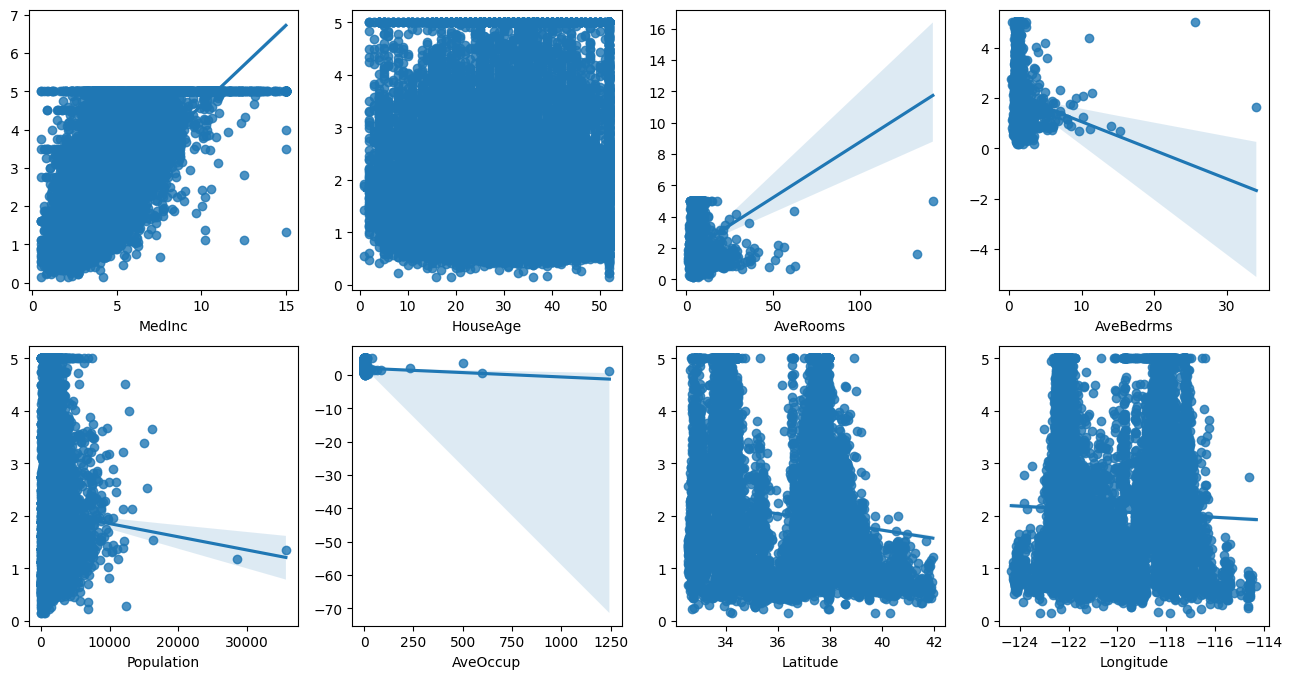

In [10]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # ax=axs[row][col] 서브플랏
    sns.regplot(x=feature , y=y,data=df_california , ax=axs[row][col])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_california)
house_scaled = scaler.transform(df_california)

house_scaled = pd.DataFrame(data=house_scaled, columns=df_california.columns)
house_scaled

X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(house_scaled , y, test_size=0.2, \
                                                       random_state=156)


model_lr2 = LinearRegression()
model_lr2.fit(X_train2 ,y_train2 )
y_preds2 = model_lr2.predict(X_test2)

mse2 = mean_squared_error(y_test2, y_preds2)
rmse2 = np.sqrt(mse2)

print('MSE2 : {0:.3f} , RMSE2 : {1:.3F}'.format(mse2 , rmse2))
print('r2_score : {0:.3f}'.format(r2_score(y_test2, y_preds2)))



print('기존 표준화 전 모델 비교')

model_lr = LinearRegression()
model_lr.fit(X_train ,y_train )
y_preds = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('r2_score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE2 : 0.558 , RMSE2 : 0.747
r2_score : 0.581
기존 표준화 전 모델 비교
MSE : 0.558 , RMSE : 0.747
r2_score : 0.581
